In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


In [19]:
# Ruta al modelo guardado
model_path = '/home/juancruz2/Bio2/ProyectoV2/efficientnetb3-Eye Disease-95.77.h5' 

# Cargar el modelo
model = tf.keras.models.load_model(model_path)


In [35]:
def load_and_preprocess_image(img_path, img_size=(224, 224)):
    # Cargar la imagen y redimensionarla
    img = image.load_img(img_path, target_size=img_size)
    
    # Convertir la imagen a un array numpy
    img_array = image.img_to_array(img)
    
    # No normalizar la imagen
    # img_array = img_array / 255.0  # Comentamos esta línea
    
    # Expandir las dimensiones para que tenga forma (1, img_size[0], img_size[1], 3)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array


In [47]:
# Ruta a la imagen individual que deseas probar
test_image_path = '/home/juancruz2/Bio2/ProyectoV2/81_left.jpg'  # Reemplaza con la ruta real a tu imagen

# Cargar y preprocesar la imagen
img_size = (224, 224)  # Debe coincidir con el tamaño utilizado durante el entrenamiento
preprocessed_image = load_and_preprocess_image(test_image_path, img_size=img_size)


In [37]:
classes = ['ARMD', 'cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
# Crear el diccionario de índices a clases
index_to_class = {index: label for index, label in enumerate(classes)}

In [48]:
# Realizar la predicción
prediction = model.predict(preprocessed_image)
# Obtener el índice de la clase con la mayor probabilidad
predicted_class_index = np.argmax(prediction, axis=1)[0]
# Obtener la etiqueta de la clase predicha
predicted_class_label = index_to_class[predicted_class_index]


1/1 [==============================] - 0s 38ms/step


La imagen fue clasificada como: cataract


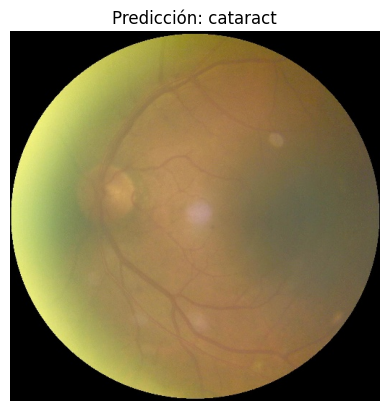

In [49]:
print(f'La imagen fue clasificada como: {predicted_class_label}')

# Mostrar la imagen con la etiqueta predicha
img = image.load_img(test_image_path)
plt.imshow(img)
plt.title(f'Predicción: {predicted_class_label}')
plt.axis('off')
plt.show()


In [43]:
print("Forma de entrada esperada por el modelo:", model.input_shape)
print("Forma de la imagen preprocesada:", preprocessed_image.shape)


Forma de entrada esperada por el modelo: (None, 224, 224, 3)
Forma de la imagen preprocesada: (1, 224, 224, 3)
